In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from tensorflow import keras
from keras.models import Sequential # intitialize the SNN
from keras.layers import Dense      # create layers

import warnings
warnings.filterwarnings("ignore")

In [3]:
input_df = pd.read_csv('Cleaned.csv')

In [4]:
input_df.head(5)

,Unnamed: 0,gender,relevent_experience,experience,last_new_job,looking_for_job,company_ind,company_type_ind,training_hours_log,enrolled_university_Full time course,...,education_level_School,city_development_level_high,city_development_level_low,city_development_level_middle,city_development_level_very high,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM
0,0,1,0,5.0,1,0,1,1,3.806662,1,...,1,0,0,0,1,0,0,0,0,1
1,1,1,0,5.0,1,1,0,0,2.833213,1,...,1,0,0,0,1,0,0,0,0,1
2,2,1,0,10.0,1,0,0,0,3.912023,0,...,0,0,0,0,1,0,0,0,0,1
3,3,1,1,21.0,5,0,1,1,4.905275,0,...,0,0,0,0,1,0,0,0,0,1
4,4,0,0,5.0,0,1,0,0,2.833213,1,...,0,1,0,0,0,0,0,0,0,1


In [5]:
input_df.shape

(19158, 25)

In [6]:
input_df.isnull().sum()

Unnamed: 0                              0
gender                                  0
relevent_experience                     0
experience                              0
last_new_job                            0
looking_for_job                         0
company_ind                             0
company_type_ind                        0
training_hours_log                      0
enrolled_university_Full time course    0
enrolled_university_Other               0
enrolled_university_Part time course    0
enrolled_university_no_enrollment       0
education_level_Graduate                0
education_level_Phd                     0
education_level_School                  0
city_development_level_high             0
city_development_level_low              0
city_development_level_middle           0
city_development_level_very high        0
major_discipline_Business Degree        0
major_discipline_Humanities             0
major_discipline_No Major               0
major_discipline_Other            

In [7]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            19158 non-null  int64  
 1   gender                                19158 non-null  int64  
 2   relevent_experience                   19158 non-null  int64  
 3   experience                            19158 non-null  float64
 4   last_new_job                          19158 non-null  int64  
 5   looking_for_job                       19158 non-null  int64  
 6   company_ind                           19158 non-null  int64  
 7   company_type_ind                      19158 non-null  int64  
 8   training_hours_log                    19158 non-null  float64
 9   enrolled_university_Full time course  19158 non-null  int64  
 10  enrolled_university_Other             19158 non-null  int64  
 11  enrolled_univer

In [8]:
y = input_df['looking_for_job']
X = input_df.drop(['looking_for_job'], axis=1)

In [6]:
X = X.astype('float32')

In [9]:
X.shape

(19158, 24)

In [89]:
# Стандартизация

#scaler_x = MinMaxScaler()
#X_s = scaler_x.fit_transform(X)

### Modeling and Prediction

In [10]:
# Разделение на обучающую и тестовую выборки
np.random.seed(42)

X_split, X_test, y_split, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Выделение выборки валидации из обучающей выборки

X_train, X_val, y_train, y_val = train_test_split(X_split, y_split, test_size=0.2, random_state=42)

In [12]:
# Инициализация сети

model = Sequential()

# Слои

model.add(Dense(units=17, input_shape=(24,), activation='relu'))
model.add(Dense(units=5, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# Компиляция
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['accuracy'])

# Обучение сети

ready_CNN = model.fit(X_train, y_train, 
                      batch_size=64, 
                      epochs=500, 
                      validation_data=(X_val, y_val))

Epoch 1/500
180/180 [==============================] - 1s 4ms/step - loss: 0.2050 - accuracy: 0.7533 - val_loss: 0.1999 - val_accuracy: 0.7401
Epoch 2/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.7533 - val_loss: 0.1946 - val_accuracy: 0.7401
Epoch 3/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.7533 - val_loss: 0.1930 - val_accuracy: 0.7401
Epoch 4/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 5/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1863 - accuracy: 0.7533 - val_loss: 0.1925 - val_accuracy: 0.7401
Epoch 6/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.7533 - val_loss: 0.1924 - val_accuracy: 0.7401
Epoch 7/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.7533 - val_loss: 0.1925 - val_accuracy: 0.7401

Epoch 58/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 59/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 60/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 61/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 62/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 63/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 64/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy:

Epoch 115/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 116/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 117/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 118/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 119/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 120/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 121/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_ac

180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 172/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 173/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 174/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 175/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 176/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 177/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401

180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 228/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 229/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 230/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 231/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 232/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 233/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401

180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1917 - val_accuracy: 0.7401
Epoch 284/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1929 - val_accuracy: 0.7401
Epoch 285/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1928 - val_accuracy: 0.7401
Epoch 286/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1927 - val_accuracy: 0.7401
Epoch 287/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1927 - val_accuracy: 0.7401
Epoch 288/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 289/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401

180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 340/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 341/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 342/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 343/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 344/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 345/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401

180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 396/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 397/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 398/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 399/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 400/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 401/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401

180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 452/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 453/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 454/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 455/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 456/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401
Epoch 457/500
180/180 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.7533 - val_loss: 0.1926 - val_accuracy: 0.7401

In [1]:
# архитектура нейронной сети

# model.summary()

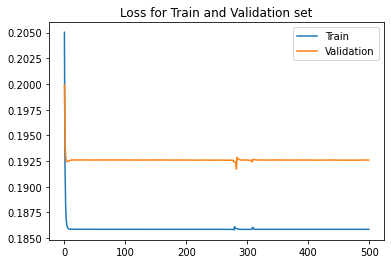

In [13]:
plt.title('Loss for Train and Validation set')
plt.plot(ready_CNN.history['loss'], label='Train')
plt.plot(ready_CNN.history['val_loss'], label='Validation')
plt.legend()

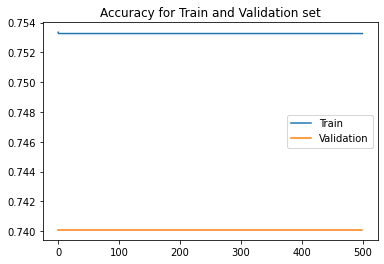

In [14]:
plt.title('Accuracy for Train and Validation set')
plt.plot(ready_CNN.history['accuracy'], label='Train')
plt.plot(ready_CNN.history['val_accuracy'], label='Validation')
plt.legend()

In [15]:
print('Оценка тестовых данных')
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print('test loss:', test_loss, 'test acc:', test_acc)

Оценка тестовых данных
test loss: 0.1871497482061386 test acc: 0.7507306933403015


In [16]:
y_pred = model.predict(X_test)

In [17]:
y_test_list = y_test.to_list()
print(y_pred[50][0], y_test_list[50])

0.24658737 0


In [18]:
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization

In [19]:
def build_model(hp):                                 # На вход функция получает движок гиперпараметров керас тюнер
    model = Sequential()
    activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])
    model.add(Dense(units=hp.Int('units_input',
                                   min_value=3,
                                   max_value=128,
                                   step=4),
                   input_shape=(24,),
                   activation=activation_choice))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                     min_value=4,
                                     max_value=128,
                                     step=4),
                        activation=activation_choice))
        
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=hp.Choice('optimizer', values=['sgd', 'adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

### Создание тюнера
В тюнере реализованы 3 алгоритма
- **RandomSearch** - случайный поиск,
- **Hyperband** - алгоритм оптимизации на основе алгоритма 2Многорукого бандита2, 
- **BayesianOptimization** - байесовская оптимизация

In [20]:
tuner = RandomSearch(
    build_model,                            # функция создания модели
    objective='val_accuracy',               # метрика для оптимизации - доля правильных ответов на проверочном наборе данных
    max_trials=64,                          # максимальное количество запусков обучения
    directory='D:/Projects/test_directory',  # каталог, куда сохраняются обученные сети
    overwrite=True)

### Запуск подбора гиперпараметров

In [21]:
tuner.search_space_summary() # простанство поиска гиперпараметров

Search space summary
Default search space size: 5
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 128, 'step': 4, 'sampling': None}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 128, 'step': 4, 'sampling': None}
optimizer (Choice)
{'default': 'sgd', 'conditions': [], 'values': ['sgd', 'adam', 'rmsprop'], 'ordered': False}


Подбор гиперпараметров

In [22]:
# метод search вызывается также, как метод fit у модели
tuner.search(X_train,
             y_train,
             batch_size=64,
             epochs=50,
             validation_data=(X_val, y_val),
             verbose=1
            )

Trial 64 Complete [00h 00m 20s]
val_accuracy: 0.7400835156440735

Best val_accuracy So Far: 0.7609603404998779
Total elapsed time: 00h 28m 57s
INFO:tensorflow:Oracle triggered exit


In [23]:
# Итог подбора гиперпараметров

tuner.results_summary()

Results summary
Results in D:/Projects/test_directory\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
activation: selu
units_input: 83
num_layers: 1
units_0: 16
optimizer: adam
units_1: 108
units_2: 4
Score: 0.7609603404998779
Trial summary
Hyperparameters:
activation: selu
units_input: 43
num_layers: 2
units_0: 112
optimizer: adam
units_1: 92
units_2: 44
Score: 0.7592206001281738
Trial summary
Hyperparameters:
activation: relu
units_input: 87
num_layers: 2
units_0: 88
optimizer: adam
units_1: 36
units_2: 4
Score: 0.7592206001281738
Trial summary
Hyperparameters:
activation: selu
units_input: 99
num_layers: 1
units_0: 112
optimizer: adam
units_1: 52
units_2: 44
Score: 0.757132887840271
Trial summary
Hyperparameters:
activation: relu
units_input: 71
num_layers: 1
units_0: 64
optimizer: adam
units_1: 120
units_2: 48
Score: 0.756784975528717
Trial summary
Hyperparameters:
activation: elu
units_input: 107
num_layers: 1
units_0: 72
optimizer: adam
units_1: 116
units_2

### Выбираем лучшую модель

In [24]:
# Получаем 3 лучших модели

models = tuner.get_best_models(num_models=1)

In [97]:
# Оценка качества работы моделей на тестовых выборках

In [25]:
for model in models:
    model.summary()
    model.evaluate(X_test, y_test)
    print()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 83)                2075      
                                                                 
 dense_1 (Dense)             (None, 16)                1344      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,436
Trainable params: 3,436
Non-trainable params: 0
_________________________________________________________________
150/150 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.7695



### Вывод

При ручном подборе параметров была создана нейронная сеть с одним скрытым слоем. Точность ее работы - 0.75

С помощью тюнера подбора гиперпараметров нейронной сети удалось немного улучшить результат.
Была выбрана наилучшая модель, с accuracy: 0.7695.

Это не самый лучший результат. Можно предположить, что при бОльшем количестве данных результат будет лучше, также можно дополнительно поработать с фичами.